This notebook explores how the cost of insurance on the health insurance marketplace in South Carolina has changed over time.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14.0, 5.0)
matplotlib.rcParams['axes.titlesize'] = 18

Read in the data and make some of the column names friendlier. 

In [91]:
def changeColNames(df, year):
    cols = {'stddev_samp(IndividualRate)': 'std_IndividualRate' + '_' + year, 'avg_IndividualRate': 'avg_IndividualRate' + '_' + year}
    return df.rename(columns=cols)

av14 = changeColNames(pd.read_csv('output/averages-2014.csv'), '2014')
av15 = changeColNames(pd.read_csv('output/averages-2015.csv'), '2015')
av16 = changeColNames(pd.read_csv('output/averages-2016.csv'), '2016')
av17 = changeColNames(pd.read_csv('output/averages-2017.csv'), '2017')


Join the data for all the years and select only the South Carolina rates. Notice that to make the data easier to visualize and digest, we're only selecting a handful of age values. 

In [93]:
mergeCols = ['Age', 'MetalLevel', 'StateCode']
avAll = (av14.merge(av15, on=mergeCols, how='outer')
         .merge(av16, on=mergeCols, how='outer')
         .merge(av17, on=mergeCols, how='outer'))

sc = avAll[(avAll.StateCode == 'SC') & avAll.Age.isin(['25', '35', '45', '55', '65 and over'])]

sc.head()

,Age,MetalLevel,StateCode,avg_IndividualRate_2014,std_IndividualRate_2014,avg_IndividualRate_2015,std_IndividualRate_2015,avg_IndividualRate_2016,std_IndividualRate_2016,avg_IndividualRate_2017,std_IndividualRate_2017
633,25,Catastrophic,SC,183.078224,32.112544,173.876688,28.566159,199.858829,16.863098,230.096957,10.903198
830,55,Platinum,SC,895.818043,162.957004,1183.296957,71.906703,NaN,NaN,NaN,NaN
970,45,Platinum,SC,580.075435,105.517972,766.226522,46.562911,NaN,NaN,NaN,NaN
1269,25,Silver,SC,270.558312,40.194969,285.733607,47.700568,289.330381,29.201613,330.967529,25.110982
1313,55,Catastrophic,SC,406.636711,71.325701,386.198766,63.448140,443.909099,37.454981,511.071957,24.217426


Reshape the data so we can more easily visualize the change in rates from year to year.

In [95]:
valColumns = ['avg_IndividualRate_2014', 'avg_IndividualRate_2015','avg_IndividualRate_2016', 'avg_IndividualRate_2017']
scMelted = pd.melt(sc, id_vars=['Age', 'MetalLevel'], value_name='averageRate', var_name='year', value_vars=valColumns)
scMelted.head()

,Age,MetalLevel,year,averageRate
0,25,Catastrophic,avg_IndividualRate_2014,183.078224
1,55,Platinum,avg_IndividualRate_2014,895.818043
2,45,Platinum,avg_IndividualRate_2014,580.075435
3,25,Silver,avg_IndividualRate_2014,270.558312
4,55,Catastrophic,avg_IndividualRate_2014,406.636711


First, for every level of insurance plan, let's look at how the rates have changed for each age we selected.

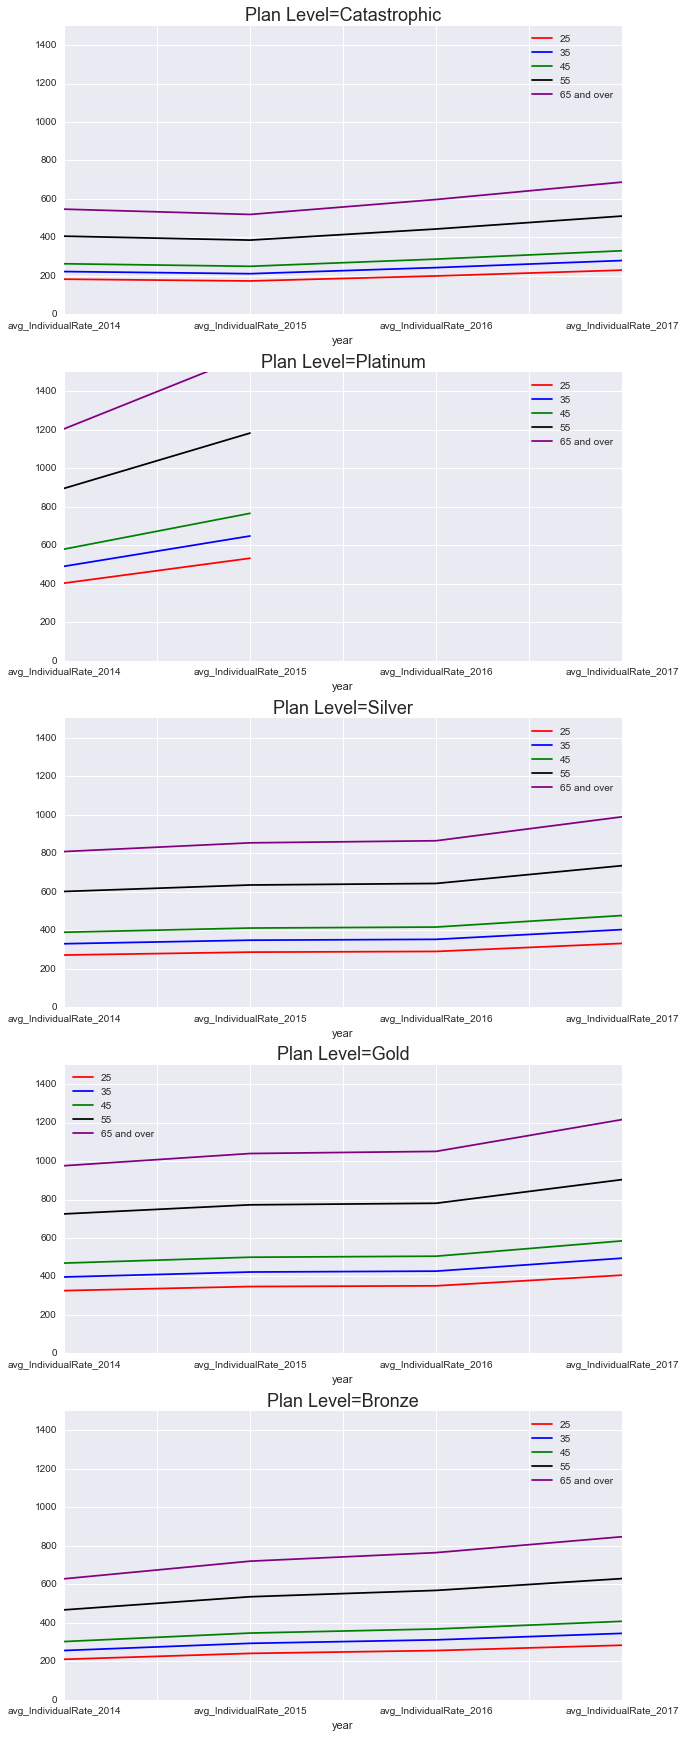

In [103]:
uniqueMetals = scMelted.MetalLevel.unique()
ages = {'25':'red', '35':'blue', '45':'green', '55':'black', '65 and over':'purple'}
fig, axes = plt.subplots(uniqueMetals.shape[0], 1, figsize=(10, 30))
for ax, metal in zip(axes.ravel(), uniqueMetals):
    metalDf = scMelted[scMelted.MetalLevel == metal]
    
    for age, group in metalDf.groupby('Age'):
        group.plot.line(ax=ax, x='year', y='averageRate', label=age, color=ages[age])
    ax.set_title('Plan Level='+metal)
    ax.set_ylim([0, 1500])

The gaps between the 45, 55, and 65 ages are much larger than the gaps between the younger ages. Perhaps it's in your late forties or early fifties when your risk of illness really starts to increase?

We can see that all of the rates have increased over the years -- though it seems that they may increased more older people.

Now let's look at the data another way -- grouping by age and plotting how the cost of the various levels of plan have changed. 

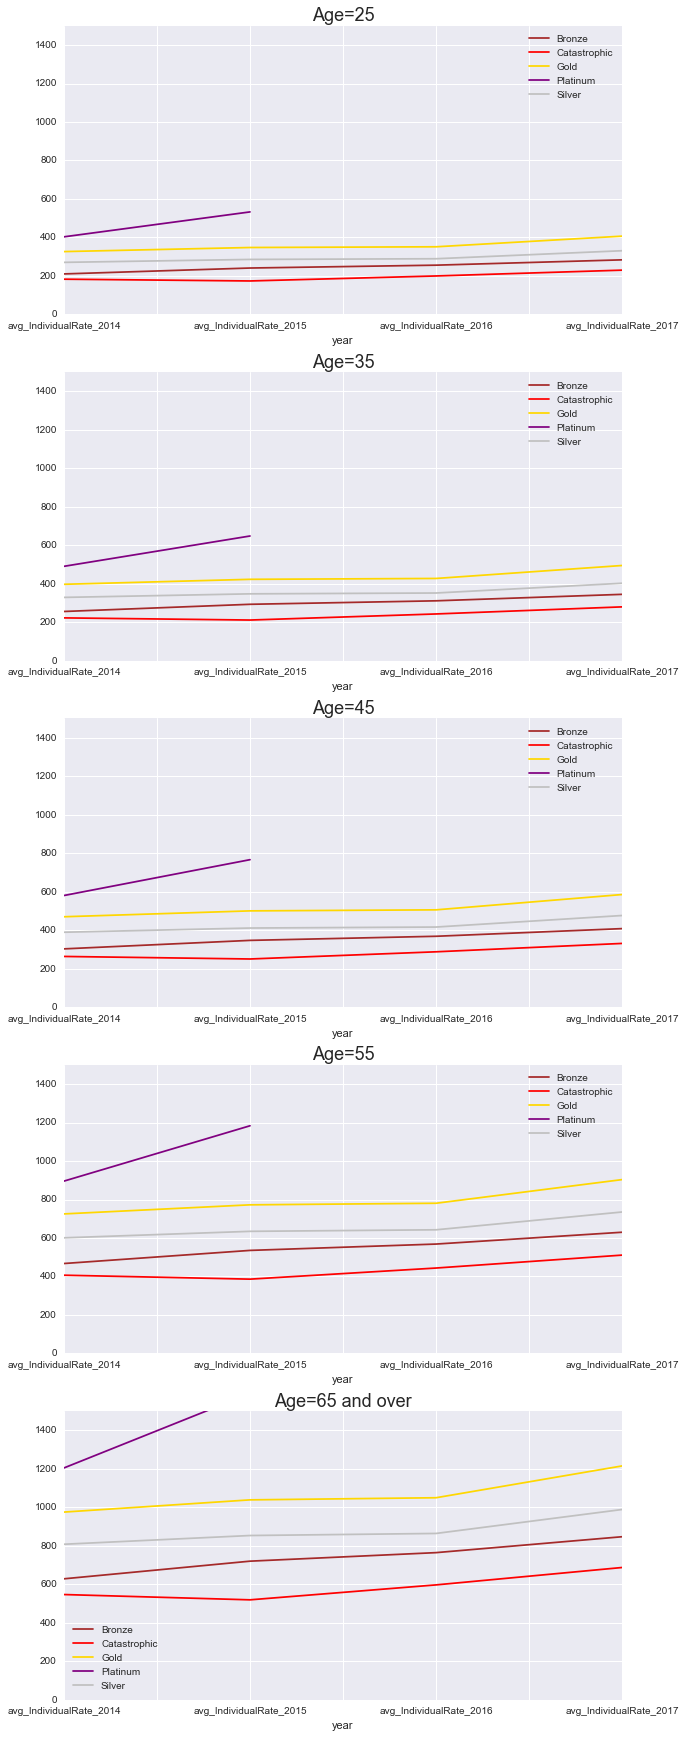

In [102]:
uniqueAges = np.sort(scMelted.Age.unique())
metals ={'Catastrophic':'red', 'Platinum':'purple', 'Silver':'silver', 'Gold':'gold', 'Bronze': 'brown'}
fig, axes = plt.subplots(uniqueAges.shape[0], 1, figsize=(10, 30))

for ax, age in zip(axes.ravel(), uniqueAges):
    ageDf = scMelted[scMelted.Age == age]
    for metal, group in ageDf.groupby('MetalLevel'):
        group.plot.line(ax=ax, x='year', y='averageRate', label=metal, color=metals[metal])
    ax.set_title('Age='+age)
    ax.set_ylim([0, 1500])

It like rates for older people have changed more dramatically than those for their younger counterparts. It also seems for older people there is a larger difference between the plan levels. However, we should probably look at the percentage changes to get the full picture.